# Sistema de $N$ especies en competencia.

24/agosto/2022

Resumen: la idea es generar el primer paso de mi tesis comprobando la ley circular dada por Robert May y extendida por Stefano. El objetivo es generar sistemas de 5 y 10 especies en competencia con valores aleatorios en la matriz de interacciones, y ver si cumple la ley circular.

Para ello, de entrada se necesitará que los valores propios de la matriz tengan parte real negativa.

In [1]:
using LinearAlgebra
using Plots

plotlyjs()

WebIO._IJuliaInit()

Plots.PlotlyJSBackend()

In [19]:
"""RK4

Runge-Kutta 4. Es un integrador para resolver sistemas de ecuaciones diferenciales aunque
probablemente también pueda resolver ecuaciones diferenciales normales.

Parámetros:

f := función de variables Real
x0 := condiciones iniciales del sistema dinámico
t0 := tiempo inicial
tf := tiempo final
h := paso de integración
"""

function RK4(f,x0,t0,tf,h)
    #=al igual que en la función de eulerND, definimos una matriz de dimensión 
    (número de iteraciones × dimensión del sistema dinámico) como conjunto solución=#
    t = range(t0, stop = tf, step = h)
    n = length(t)
    dim = length(x0)
    #lo hacemos en un arreglo de ceros
    xs = zeros(n,dim)
    #imponemos la condición inicial en el primer renglón
    xs[1,:] = x0
    #generamos un ciclo for con las iteraciones de runge-kutta de cuarto orden
    for i in  2:n
        k1 = f(xs[i-1,:])
        k2 = f(xs[i-1,:]+(h/2)*k1)
        k3 = f(xs[i-1,:]+(h/2)*k2)
        k4 = f(xs[i-1,:]+h*k3)
        
        xs[i,:] = xs[i-1,:] + (h/6)*(k1+2*k2+2*k3+k4)
    end
    #=regresamos el resultado en una tupla, con los tiempos en la primera entrada y 
    el conjunto solución en la segunda entrada=#
    return (t , xs)
end


RK4 (generic function with 1 method)

Utilizar la función `randn()` para generar númeror aleatorios bajo la distribución normal.

In [2]:
using Random
rng = MersenneTwister(1234)
randn!(rng, zeros(5,5))

5×5 Matrix{Float64}:
  0.867347   2.21188   -0.560501    0.110096    1.56417
 -0.901744   0.532813  -0.0192918  -0.251176   -1.39674
 -0.494479  -0.271735   0.128064    0.369714    1.1055
 -0.902914   0.502334   1.85278     0.0721164  -1.10673
  0.864401  -0.516984  -0.827763   -1.50343    -3.21136

In [19]:
function hola(X)
    A = [rand() rand();rand() rand()]
    return A*X
end

hola (generic function with 1 method)

In [20]:
hola([1,1])

2-element Vector{Float64}:
 0.5375190267892946
 1.4357404181506883

In [33]:
randn(5,5) - Matrix(1I,5,5)
#Matrix(1I,5,5)

5×5 Matrix{Float64}:
  0.240729   -0.854998    -0.314548  -0.918211  -0.664112
 -0.0637414  -1.35274     -0.193449  -0.150626  -0.452517
 -0.324812    0.00756373  -0.721251  -0.842769  -1.08491
 -0.468692    0.387738    -0.231456  -2.60038   -1.43034
 -0.249876    1.87454      0.660237  -0.193022   0.274436

### 30 enero 2023

In [1]:
include("main.jl")

WebIO._IJuliaInit()

redAleatoria (generic function with 1 method)

5×5 SparseArrays.SparseMatrixCSC{Float64, Int64} with 15 stored entries:
 1.21912    ⋅          ⋅          ⋅          ⋅ 
  ⋅        1.61631   -0.419603   2.16559     ⋅ 
  ⋅        0.56523    0.630698  -0.913686  -0.498953
  ⋅       -0.265138   2.03858    1.45308    0.219482
  ⋅         ⋅         0.184974  -0.491702   0.100102

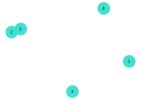

In [39]:
#Red aleatoria
M = randomMatrix(5,0.25)
display(M)
gplot(g,nodelabel = 1:5)

In [40]:
x0 = [rand(), rand(), rand(), rand(), rand()]
#x0 = [rand(),1]
t0 = 0
tf = 20
dt = 0.1

t, sol = cincoEspecies(x0,t0,tf,dt,M)

(0.0:0.1:20.0, [0.9679120389449084 0.9275682519037761 … 0.3449597069061475 0.7580335577795017; 1.0072100233799735 0.9890936443389096 … 0.37242412911652517 0.8371038263037323; … ; 1.640529385862261 4.894286371702437 … 2.18738571764634e-96 18.333468438261242; 1.6405293861093928 4.894286380567216 … 5.918748489525874e-97 18.333468478041258])

In [41]:
plot(t,sol[:,1],label ="Especie 1",w=2)

plot!(t,sol[:,2],label ="Especie 2",w=2)
plot!(t,sol[:,3],label ="Especie 3",w=2)
plot!(t,sol[:,4],label ="Especie 4",w=2)
plot!(t,sol[:,5],label ="Especie 5",w=2)

In [5]:
plot(sol[:,1],sol[:,3],w=2,
    #xlabel = "Tiempo",
    xlabel = "Conejos",
    ylabel = "Ovejas",
    label = "",
)

Encontrar puntos fijos y averiguar si se trata de atractores o repulsores. Aquí mi primera interpretación es que las ovejas ganan y los conejos se extinguen.